In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, PredefinedSplit, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import joblib

In [18]:
df = pd.read_csv('data/hand_landmarks_data.csv')

In [19]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [21]:
df.isna().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

In [22]:
df['label'].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'y1'}>,
        <Axes: title={'center': 'z1'}>, <Axes: title={'center': 'x2'}>,
        <Axes: title={'center': 'y2'}>, <Axes: title={'center': 'z2'}>,
        <Axes: title={'center': 'x3'}>, <Axes: title={'center': 'y3'}>],
       [<Axes: title={'center': 'z3'}>, <Axes: title={'center': 'x4'}>,
        <Axes: title={'center': 'y4'}>, <Axes: title={'center': 'z4'}>,
        <Axes: title={'center': 'x5'}>, <Axes: title={'center': 'y5'}>,
        <Axes: title={'center': 'z5'}>, <Axes: title={'center': 'x6'}>],
       [<Axes: title={'center': 'y6'}>, <Axes: title={'center': 'z6'}>,
        <Axes: title={'center': 'x7'}>, <Axes: title={'center': 'y7'}>,
        <Axes: title={'center': 'z7'}>, <Axes: title={'center': 'x8'}>,
        <Axes: title={'center': 'y8'}>, <Axes: title={'center': 'z8'}>],
       [<Axes: title={'center': 'x9'}>, <Axes: title={'center': 'y9'}>,
        <Axes: title={'center': 'z9'}>, <Axes: title={'center

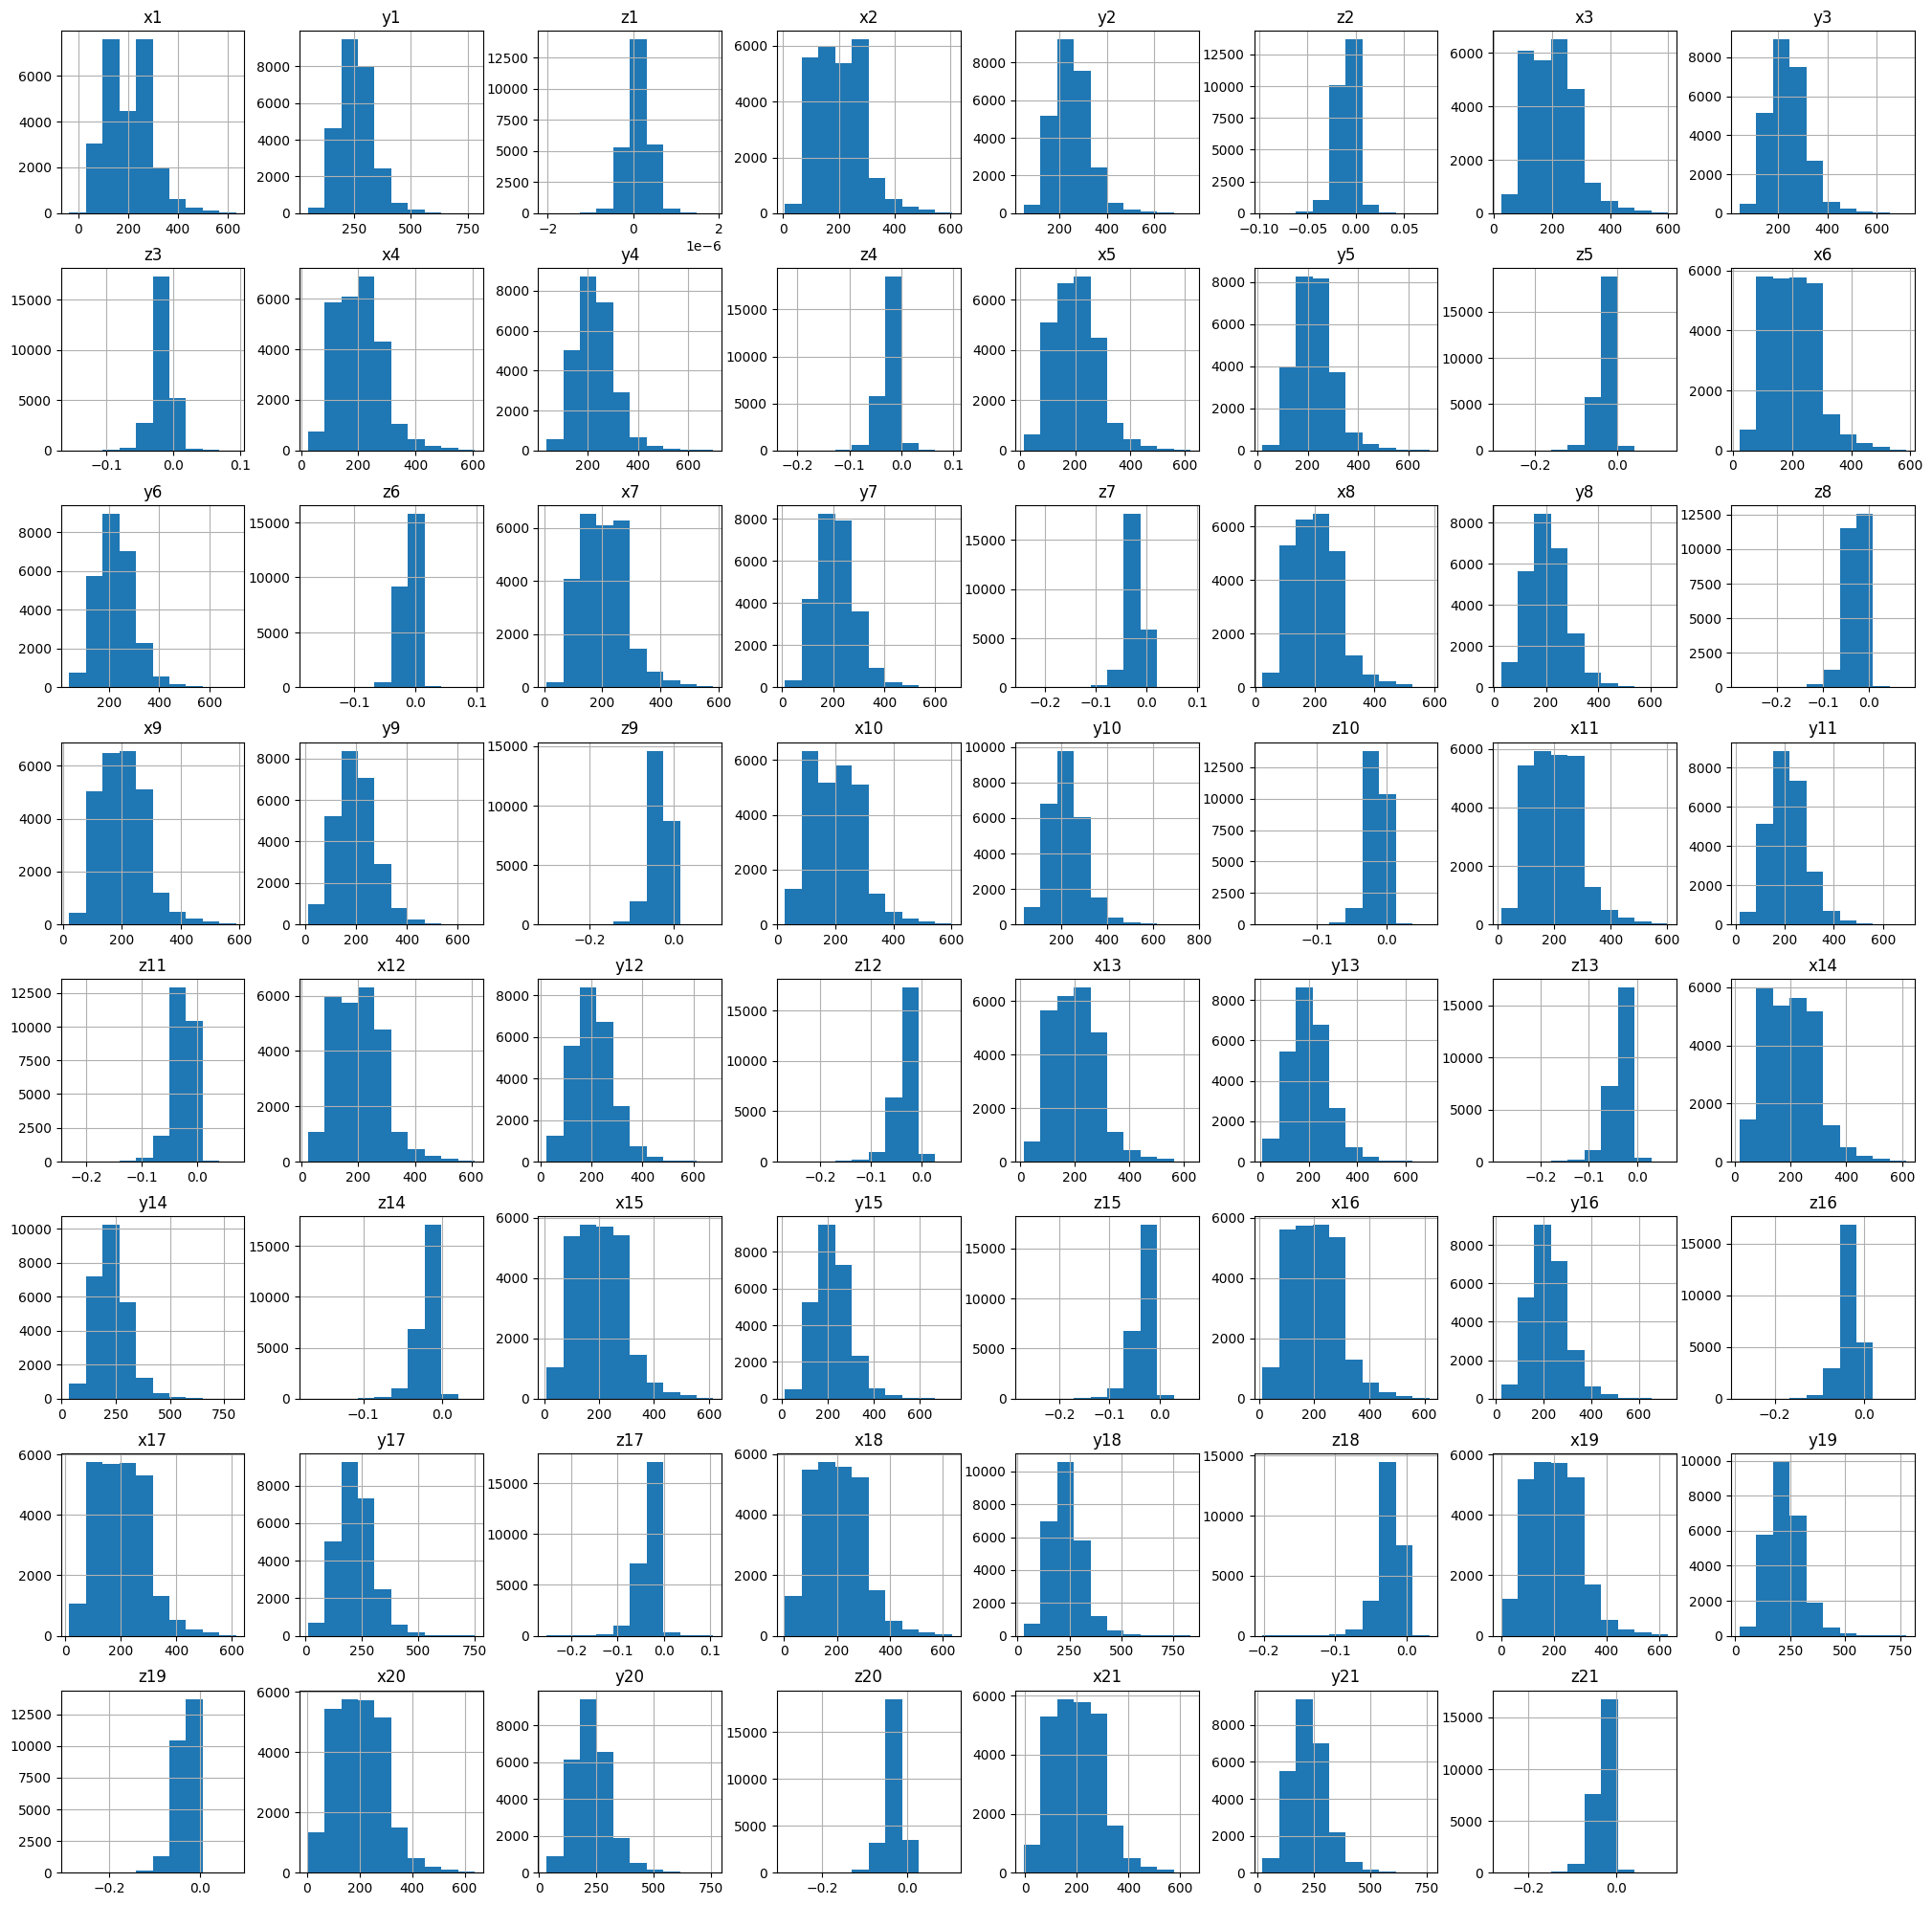

In [24]:
df.hist(figsize=(25,25))

# Class Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_24648\1264957597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


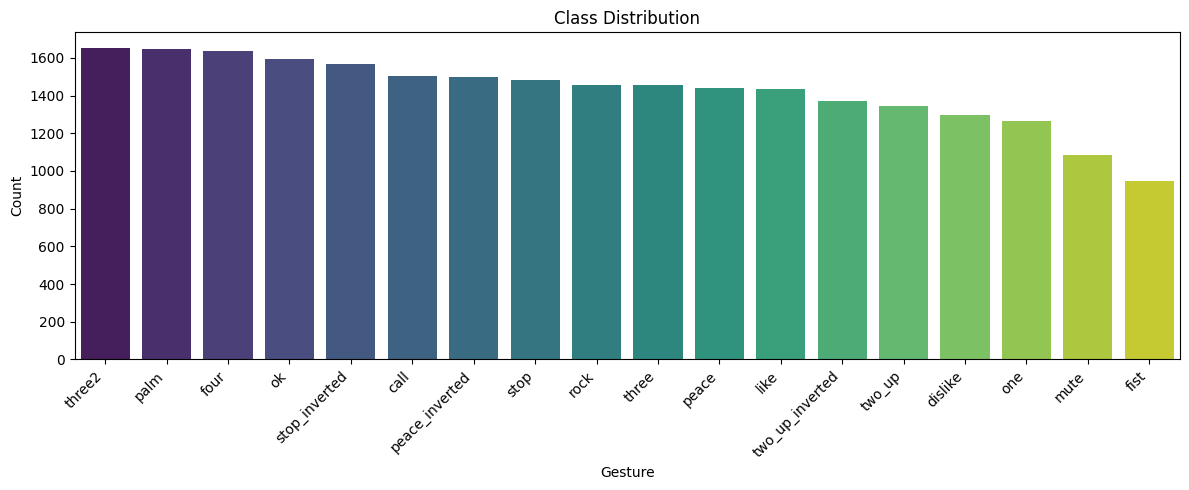

In [25]:
label_col = df.columns[-1]
class_counts = df[label_col].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Gesture')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#  Scatter Plot BEFORE Normalization


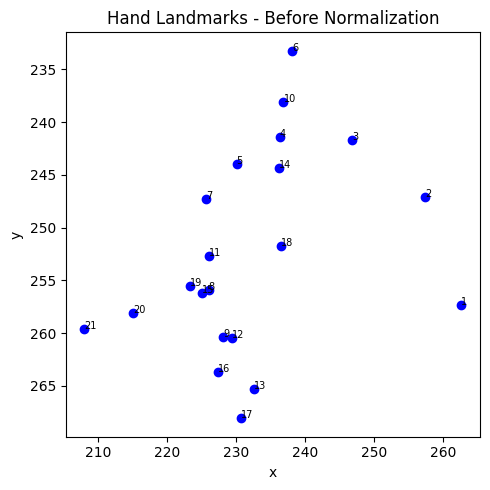

In [26]:
x_cols = [col for col in df.columns if col.startswith('x')]
y_cols = [col for col in df.columns if col.startswith('y')]
z_cols = [col for col in df.columns if col.startswith('z')]

sample = df.iloc[0]
x_vals = sample[x_cols].values
y_vals = sample[y_cols].values

plt.figure(figsize=(5, 5))
plt.scatter(x_vals, y_vals, c='blue')
plt.gca().invert_yaxis()
for i, (x, y) in enumerate(zip(x_vals, y_vals)):
    plt.annotate(str(i + 1), (x, y), fontsize=7)
plt.title('Hand Landmarks - Before Normalization')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

# Geometric Normalization

In [27]:
wrist_x = df['x1'].copy()
wrist_y = df['y1'].copy()

df[x_cols] = df[x_cols].sub(wrist_x, axis=0)
df[y_cols] = df[y_cols].sub(wrist_y, axis=0)

scale = np.sqrt(df['x13']**2 + df['y13']**2)
scale = scale.replace(0, 1.0)

df[x_cols] = df[x_cols].div(scale, axis=0)
df[y_cols] = df[y_cols].div(scale, axis=0)

print("NaN count:", df.isna().sum().sum())
print("Inf count:", np.isinf(df[x_cols + y_cols].values).sum())

NaN count: 0
Inf count: 0


# Scatter Plot AFTER Normalization

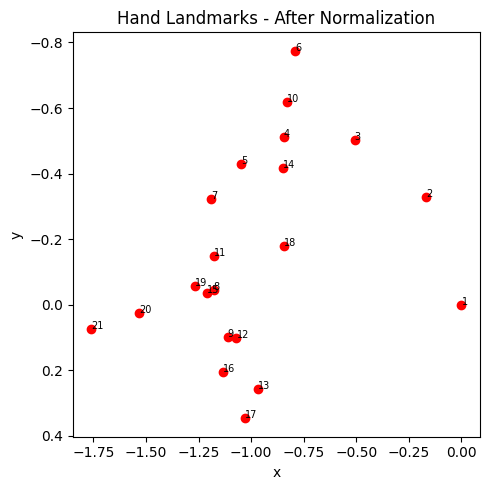

In [28]:
sample = df.iloc[0]
x_vals = sample[x_cols].values
y_vals = sample[y_cols].values

plt.figure(figsize=(5, 5))
plt.scatter(x_vals, y_vals, c='red')
plt.gca().invert_yaxis()
for i, (x, y) in enumerate(zip(x_vals, y_vals)):
    plt.annotate(str(i + 1), (x, y), fontsize=7)
plt.title('Hand Landmarks - After Normalization')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

# Stratified Split 
- 80% Train
- 10% Validation
- 10% Test


In [29]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_valtest, y_train, y_valtest = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_valtest, y_valtest, test_size=0.5, random_state=42, stratify=y_valtest)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

X_trainval = np.concatenate([X_train, X_val])
y_trainval = np.concatenate([y_train, y_val])

test_fold = np.concatenate([np.full(len(X_train), -1), np.zeros(len(X_val))])
ps = PredefinedSplit(test_fold)

Train: (20540, 63), Val: (2567, 63), Test: (2568, 63)


# Model Training (Holdlout Validation is enough, no need for cv for this data. faster train)

In [30]:
models = {
    'SVC': GridSearchCV(
    SVC(),
    {'kernel': ['linear', 'rbf'], 'C': [1, 10, 20, 50, 130]},
    cv=ps, scoring='accuracy', n_jobs=-1, verbose=1
    ),
    'LogisticRegression': GridSearchCV(
        LogisticRegression(max_iter=10000),
        {'C': [0.01, 0.1, 1, 10, 100]},
        cv=ps, scoring='accuracy', n_jobs=-1, verbose=1
    ),
    'RandomForest': GridSearchCV(
        RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
        cv=ps, scoring='accuracy', n_jobs=-1, verbose=1
    )
}

for name, gs in models.items():
    print(f"\nTraining {name}...")
    gs.fit(X_trainval, y_trainval)
    print(f"{name} Best Params: {gs.best_params_}")
    print(f"{name} Val Accuracy: {gs.best_score_:.4f}")


Training SVC...
Fitting 1 folds for each of 10 candidates, totalling 10 fits
SVC Best Params: {'C': 130, 'kernel': 'rbf'}
SVC Val Accuracy: 0.9887

Training LogisticRegression...
Fitting 1 folds for each of 5 candidates, totalling 5 fits
LogisticRegression Best Params: {'C': 100}
LogisticRegression Val Accuracy: 0.9217

Training RandomForest...
Fitting 1 folds for each of 9 candidates, totalling 9 fits
RandomForest Best Params: {'max_depth': None, 'n_estimators': 200}
RandomForest Val Accuracy: 0.9813


# Evaluation Helper

In [31]:
def evaluate_model(name, model, X_test, y_test):
    test_pred = model.predict(X_test)

    results = {
        'Model':          name,
        'Val Accuracy':   model.best_score_,
        'Test Accuracy':  accuracy_score(y_test, test_pred),
        'Test Precision': precision_score(y_test, test_pred, average='weighted', zero_division=0),
        'Test Recall':    recall_score(y_test, test_pred, average='weighted', zero_division=0),
        'Test F1':        f1_score(y_test, test_pred, average='weighted', zero_division=0)
    }
    return results, test_pred

# Results Table

In [32]:
results_list = []
predictions = {}

for name, gs in models.items():
    results, test_pred = evaluate_model(name, gs, X_test, y_test)
    results_list.append(results)
    predictions[name] = test_pred

results_df = pd.DataFrame(results_list).set_index('Model')
print(results_df.round(4))

                    Val Accuracy  Test Accuracy  Test Precision  Test Recall  \
Model                                                                          
SVC                       0.9887         0.9875          0.9876       0.9875   
LogisticRegression        0.9217         0.9171          0.9178       0.9171   
RandomForest              0.9813         0.9755          0.9757       0.9755   

                    Test F1  
Model                        
SVC                  0.9875  
LogisticRegression   0.9172  
RandomForest         0.9755  


# Confusion Marix

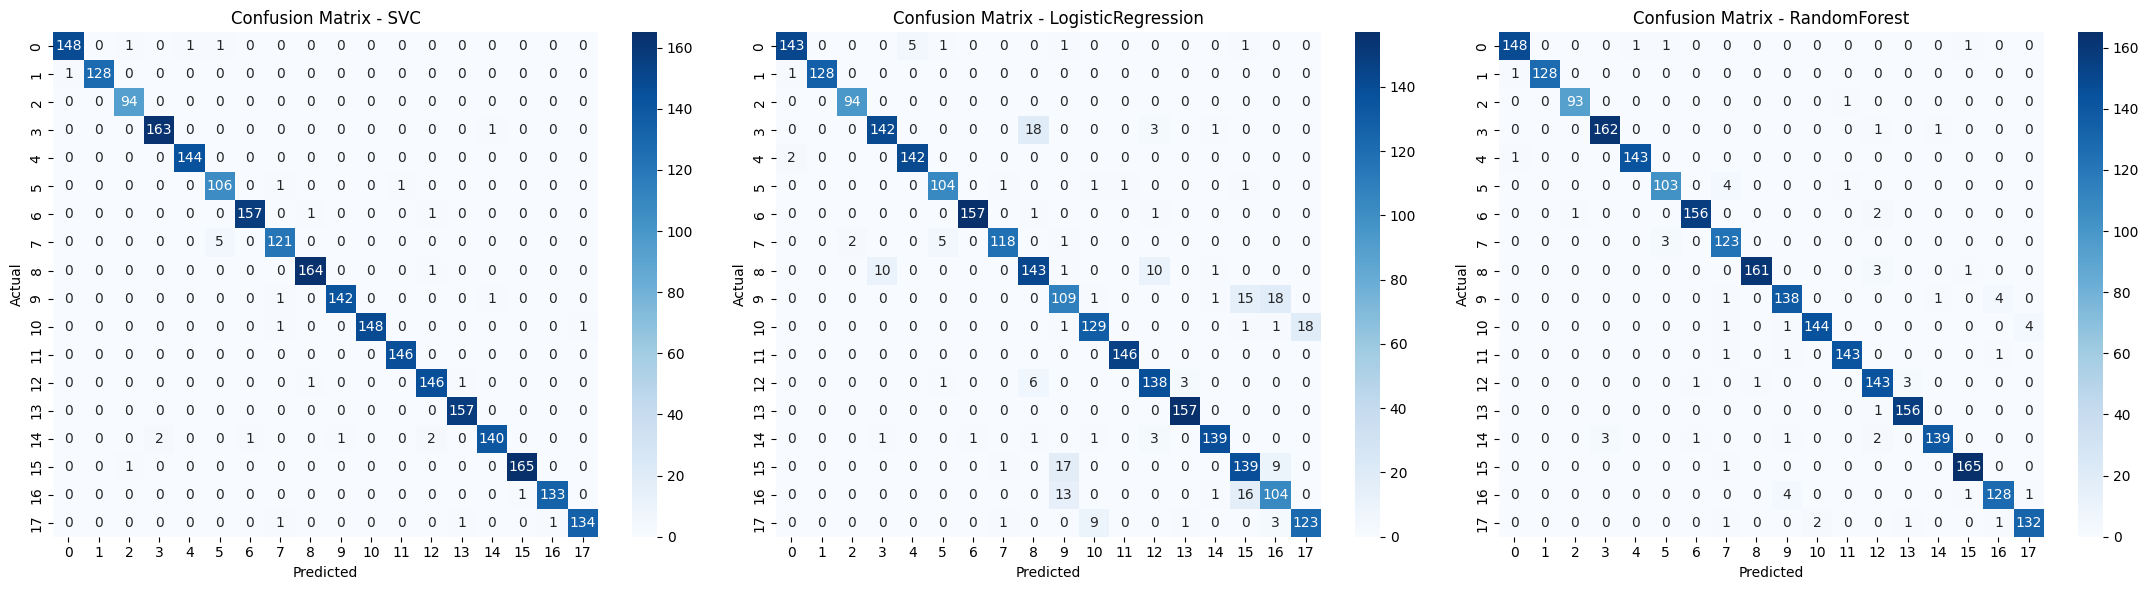

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

for ax, (name, test_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification Report

In [34]:
for name, test_pred in predictions.items():
    print(f"\n{'='*40}")
    print(f"Classification Report - {name}")
    print('='*40)
    print(classification_report(y_test, test_pred, zero_division=0))


Classification Report - SVC
                 precision    recall  f1-score   support

           call       0.99      0.98      0.99       151
        dislike       1.00      0.99      1.00       129
           fist       0.98      1.00      0.99        94
           four       0.99      0.99      0.99       164
           like       0.99      1.00      1.00       144
           mute       0.95      0.98      0.96       108
             ok       0.99      0.99      0.99       159
            one       0.97      0.96      0.96       126
           palm       0.99      0.99      0.99       165
          peace       0.99      0.99      0.99       144
 peace_inverted       1.00      0.99      0.99       150
           rock       0.99      1.00      1.00       146
           stop       0.97      0.99      0.98       148
  stop_inverted       0.99      1.00      0.99       157
          three       0.99      0.96      0.97       146
         three2       0.99      0.99      0.99       166
 

# Performance Bar Chart

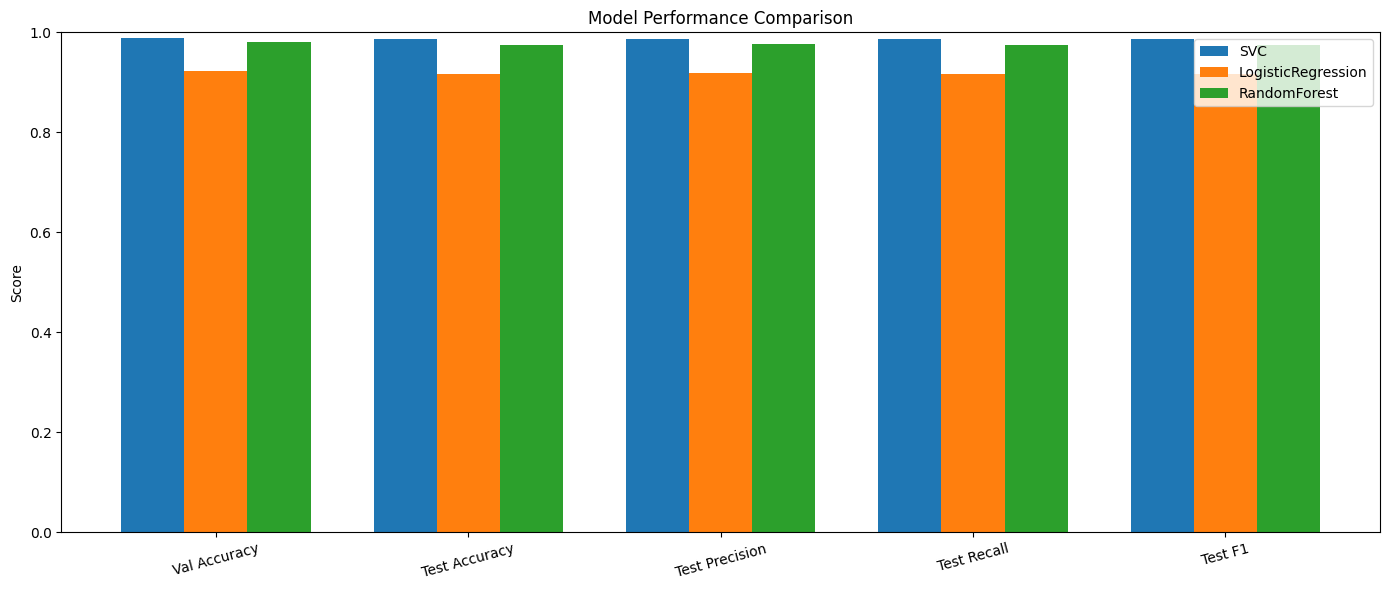

In [35]:
metrics = ['Val Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1']

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))

for i, (model_name, row) in enumerate(results_df.iterrows()):
    ax.bar(x + i * width, row[metrics].values, width, label=model_name)

ax.set_xticks(x + width)
ax.set_xticklabels(metrics, rotation=15)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(models['SVC'], 'models/gesture_model.pkl') #Best model
print("Model saved.")

Model saved.
